In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('adult.csv', header=None, index_col=False,
                   names=['年龄','单位性质','权重','学历','受教育时长','婚姻状况','职业','家庭状况','种族','性别',
                          '资产所得','资产损失','周工作时长','原籍','收入'])

data_dummies = pd.get_dummies(data)

features = data_dummies.loc[:,'年龄':'原籍_ Yugoslavia']

X = features.values
y = data_dummies['收入_ >50K'].values

In [2]:
print(X.shape)
print(y.shape)

(32561, 108)
(32561,)


In [3]:
import numpy as np

pos = 0
neg = 0

for i in range(0, 32561):
    if(y[i] == 0):
        pos = pos + 1
    else:
        neg = neg + 1

print('pos =', pos)
print('neg =', neg)

pos = 24720
neg = 7841


In [4]:
pos = 0
neg = 0

X_pos = np.zeros(shape = (24720,108), dtype = int)
X_neg = np.zeros(shape = (7841,108), dtype = int)
y_pos = np.zeros(shape = (24720,), dtype = int)
y_neg = np.ones(shape = (7841,), dtype = int)

for i in range(0, 32561):
    if(y[i] == 0):
        X_pos[pos] = X[i]
        pos = pos + 1
    else:
        X_neg[neg] = X[i]
        neg = neg + 1

print(X)
print()
print(X_pos)
print()
print(X_neg)
print()
print(y_pos)
print()
print(y_neg)

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    58 151910      9 ...      1      0      0]
 [    22 201490      9 ...      1      0      0]
 [    52 287927      9 ...      1      0      0]]

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    27 257302     12 ...      1      0      0]
 [    58 151910      9 ...      1      0      0]
 [    22 201490      9 ...      1      0      0]]

[[    52 209642      9 ...      1      0      0]
 [    31  45781     14 ...      1      0      0]
 [    42 159449     13 ...      1      0      0]
 ...
 [    53 321865     14 ...      1      0      0]
 [    40 154374      9 ...      1      0      0]
 [    52 287927      9 ...      1      0      0]]

[0 0 0 ... 0 0 0]

[1 1 1 ... 1 1 1]


In [5]:
pospl = (int)(pos/10)
negpl = (int)(neg/10)
pl = pospl + negpl

print('pospl =', pospl)
print('negpl =', negpl)
print('pl =', pl)

pospl = 2472
negpl = 784
pl = 3256


In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

In [8]:
from sklearn.svm import SVC

svc = SVC()

In [60]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

In [8]:
scores = np.zeros(shape = (10,))

for i in range(0, 10):
    for j in range(0, 10):
        if(i != j):
            gnb.fit(np.append(X_pos[pospl * j : pospl * (j + 1)], X_neg[negpl * j : negpl * (j + 1)], axis = 0),
                    np.append(y_pos[pospl * j : pospl * (j + 1)], y_neg[negpl * j : negpl * (j + 1)], axis = 0))
    scores[i] = gnb.score(np.append(X_pos[pospl * i : pospl * (i + 1)], X_neg[negpl * i : negpl * (i + 1)], axis = 0),
                          np.append(y_pos[pospl * i : pospl * (i + 1)], y_neg[negpl * i : negpl * (i + 1)], axis = 0))

print(scores)

score_sum = 0

for i in range(0, 10):
    score_sum = score_sum + scores[i]

score_mean = score_sum / 10

print(score_mean)

[0.78869779 0.79207617 0.78347666 0.78839066 0.78931204 0.79637592
 0.77886978 0.78900491 0.78716216 0.79914005]
0.7892506142506142


In [13]:
import warnings

warnings.filterwarnings('ignore')

scores = np.zeros(shape = (10,))

for i in range(0, 10):
    for j in range(0, 10):
        if(i != j):
            svc.fit(np.append(X_pos[pospl * j : pospl * (j + 1)], X_neg[negpl * j : negpl * (j + 1)], axis = 0),
                    np.append(y_pos[pospl * j : pospl * (j + 1)], y_neg[negpl * j : negpl * (j + 1)], axis = 0))
    scores[i] = svc.score(np.append(X_pos[pospl * i : pospl * (i + 1)], X_neg[negpl * i : negpl * (i + 1)], axis = 0),
                          np.append(y_pos[pospl * i : pospl * (i + 1)], y_neg[negpl * i : negpl * (i + 1)], axis = 0))

print(scores)

score_sum = 0

for i in range(0, 10):
    score_sum = score_sum + scores[i]

score_mean = score_sum / 10

print(score_mean)

[0.75952088 0.75829238 0.75829238 0.75829238 0.75767813 0.76013514
 0.75921376 0.75982801 0.76013514 0.76074939]
0.7592137592137592


In [10]:
from sklearn.model_selection import cross_val_score

gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print('GaussianNB:')
print(gnb_scores)
print(gnb_scores.mean())
print()

bnb_scores = cross_val_score(bnb, X, y, cv=10, scoring='accuracy', n_jobs = -1)
print('BernoulliNB:')
print(bnb_scores)
print(bnb_scores.mean())

GaussianNB:
[0.79275407 0.79637592 0.78961916 0.79391892 0.79514742 0.8022113
 0.78501229 0.7985258  0.79484029 0.80436118]
0.795276635317317

BernoulliNB:
[0.76420018 0.754914   0.76504914 0.75644963 0.75552826 0.75644963
 0.75798526 0.76904177 0.76873464 0.75675676]
0.7605109275127697


In [11]:
svc_scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy', n_jobs = -1)
print('SVC:')
print(svc_scores)
print(svc_scores.mean())

SVC:
[0.7583666  0.75214988 0.75399263 0.75429975 0.75890663 0.75429975
 0.75952088 0.75890663 0.75522113 0.7536855 ]
0.7559349396008899


In [61]:
sgd_scores = cross_val_score(sgd, X, y, cv=10, scoring='accuracy', n_jobs = -1)
print('SGD:')
print(sgd_scores)
print(sgd_scores.mean())

SGD:
[0.79490329 0.79330467 0.77948403 0.24078624 0.78777641 0.80374693
 0.78593366 0.78286241 0.79576167 0.79944717]
0.7364006479335002


In [35]:
from sklearn.metrics import confusion_matrix

gnb.fit(X, y)
y_predict = gnb.predict(X)

mat = confusion_matrix(y, y_predict)

print("混淆矩阵:")
print(mat)

P = mat[0, 0]/(mat[0, 0] + mat[1, 0])
print('P =', P)

R = mat[0, 0]/(mat[0, 0] + mat[0, 1])
print('R =', R)

F1 = (2 * P * R)/(P + R)
print('F1 =', F1)

混淆矩阵:
[[23451  1269]
 [ 5403  2438]]
P = 0.8127469328342691
R = 0.9486650485436893
F1 = 0.8754619778250644


In [12]:
svc.fit(X, y)
y_scores = svc.decision_function(X)

print(y_scores)

c:\users\zhenm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[-0.99980744 -0.99976772 -0.99986222 ... -1.00006587 -1.00003594
  0.32301813]


In [62]:
sgd.fit(X, y)
sgd_y_scores = sgd.decision_function(X)

print(sgd_y_scores)

[19034344.23684525 10628144.51141065 26886598.41835039 ...
 19222015.10226377 24929582.42727242 98231590.58210017]


In [63]:
sgd_y_sss = sgd_y_scores / 100000000

print(sgd_y_sss)

[0.19034344 0.10628145 0.26886598 ... 0.19222015 0.24929582 0.98231591]


In [40]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(0, 32561):
    if(y[i] == 1):
        if(y_predict[i] == 1):
            TP = TP + 1
        else:
            FN = FN + 1
    else:
        if(y_predict[i] == 1):
            FP = FP + 1
        else:
            TN = TN + 1

print(TP, ' ', FN)
print(FP, ' ', TN)

2438   5403
1269   23451


In [14]:
print(y_scores)
print(y_scores.shape)
print(y)

[-0.99980744 -0.99976772 -0.99986222 ... -1.00006587 -1.00003594
  0.32301813]
(32561,)
[0 0 0 ... 0 0 1]


In [52]:
y_sss = (y_scores + 1) /2

for i in range(0, 32561):
    if(y_sss[i] < 0):
        y_sss[i] = 0
    if(y_sss[i] > 1):
        y_sss[i] = 1

print(y_sss)

[9.62786181e-05 1.16138377e-04 6.88888180e-05 ... 0.00000000e+00
 0.00000000e+00 6.61509065e-01]


In [53]:
y_set = np.ones(shape = (32561,), dtype = int)

y_TP = np.zeros(shape = (11,), dtype = int)
y_TN = np.zeros(shape = (11,), dtype = int)
y_FP = np.zeros(shape = (11,), dtype = int)
y_FN = np.zeros(shape = (11,), dtype = int)

for t in range(0, 11):
    th = 1 - 0.1 * t
    for i in range(0, 32561):
        if(y_sss[i] < th):
            y_set[i] = 0
        else:
            y_set[i] = 1
    
    for j in range(0, 32561):
        if(y[j] == 1):
            if(y_set[j] == 1):
                y_TP[t] = y_TP[t] + 1
            else:
                y_FN[t] = y_FN[t] + 1
        else:
            if(y_set[j] == 1):
                y_FP[t] = y_FP[t] + 1
            else:
                y_TN[t] = y_TN[t] + 1
            
print('TP:')
print(y_TP)
print()
print('TN:')
print(y_TN)
print()
print('FP:')
print(y_FP)
print()
print('FN:')
print(y_FN)

TP:
[ 179  597  896 1252 6057 6602 6889 7160 7503 7723 7841]

TN:
[24720 24713 24708 24702 24689 24667 24637 24582 24517 24342     0]

FP:
[    0     7    12    18    31    53    83   138   203   378 24720]

FN:
[7662 7244 6945 6589 1784 1239  952  681  338  118    0]


In [54]:
y_P = np.zeros(shape = (11,), dtype = float)
y_R = np.zeros(shape = (11,), dtype = float)
y_F1 = np.zeros(shape = (11,), dtype = float)

for i in range(0, 11):
    y_P[i] = y_TP[i]/(y_TP[i] + y_FP[i])
    y_R[i] = y_TP[i]/(y_TP[i] + y_FN[i])
    y_F1[i] = (2 * y_P[i] * y_R[i])/(y_P[i] + y_R[i])
    
print(y_P)
print()
print(y_R)
print()
print(y_F1)

[1.         0.9884106  0.98678414 0.98582677 0.99490802 0.99203606
 0.98809524 0.98109071 0.97365689 0.95333909 0.24080956]

[0.02282872 0.07613825 0.11427114 0.15967351 0.772478   0.84198444
 0.87858691 0.91314883 0.95689325 0.9849509  1.        ]

[0.0446384  0.14138544 0.20482341 0.27483262 0.86969632 0.91087196
 0.93012894 0.94590131 0.96520229 0.96888722 0.3881491 ]


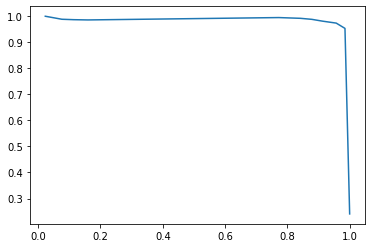

In [55]:
import matplotlib.pyplot as plt

plt.plot(y_R,y_P)

In [56]:
y_TPR = np.zeros(shape = (11,), dtype = float)
y_FPR = np.zeros(shape = (11,), dtype = float)

for i in range(0, 11):
    y_TPR[i] = y_TP[i]/(y_TP[i] + y_FN[i])
    y_FPR[i] = y_FP[i]/(y_TN[i] + y_FP[i])
    
print(y_TPR)
print()
print(y_FPR)

[0.02282872 0.07613825 0.11427114 0.15967351 0.772478   0.84198444
 0.87858691 0.91314883 0.95689325 0.9849509  1.        ]

[0.00000000e+00 2.83171521e-04 4.85436893e-04 7.28155340e-04
 1.25404531e-03 2.14401294e-03 3.35760518e-03 5.58252427e-03
 8.21197411e-03 1.52912621e-02 1.00000000e+00]


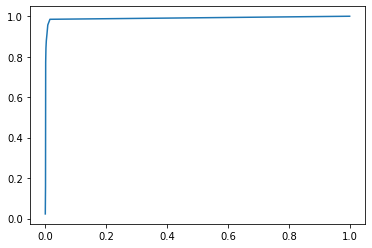

In [57]:
plt.plot(y_FPR,y_TPR)

In [58]:
AUC = 0

for i in range(0, 10):
    AUC = AUC + (((y_FPR[i + 1] - y_FPR[i]) * (y_TPR[i + 1] + y_TPR[i])) / 2)

print(AUC)

0.990698573674433


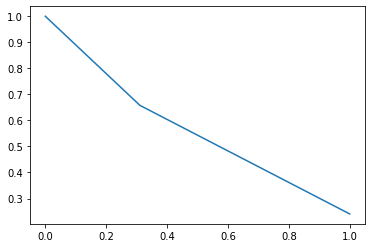

In [13]:
from sklearn.metrics import precision_recall_curve
 
precision, recall, _ = precision_recall_curve(y, y_predict)
 
plt.plot(recall,precision)

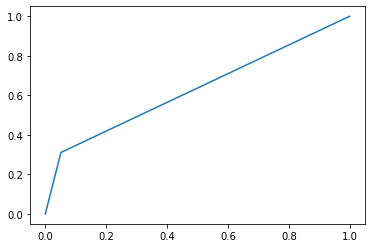

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_predict)

plt.plot(fpr,tpr)

In [16]:
from sklearn.metrics import auc

AUC = auc(fpr, tpr)

print('AUC =', AUC)

AUC = 0.6297973884473326
